Load the Data: Read the CSV file and display the first few rows.
Explore the Data: 
1. Check for missing values, data types, and descriptive statistics.
2. Analyze Trends in Sales: Identify trends in sales of all four products over different months.
3. Identify the Best-Selling Product: Determine which product has the highest sales in all given years.
4. Estimate Sales on December 31st: Predict the number of units sold on December 31st if retail centers were open.
5. Analyze the Impact of Dropping a Product: Evaluate the potential impact of dropping one of the products.
6. Predict Sales and Revenue for 2024: Forecast the yearly sales and revenues for the year 2024.


The dataset contains the following columns:

Unnamed: 0: Index column (can be ignored).
Date: Date of the sales data.
Q-P1, Q-P2, Q-P3, Q-P4: Total unit sales for products P1, P2, P3, and P4 respectively.
S-P1, S-P2, S-P3, S-P4: Total revenue generated from products P1, P2, P3, and P4 respectively.

Q1- Total unit sales of product 1
Q2- Total unit sales of product 2
Q3- Total unit sales of product 3
Q4- Total unit sales of product 4
S1- Total revenue from product 1
S2- Total revenue from product 2
S3- Total revenue from product 3
S4- Total revenue from product 4

#### liberies used

In [86]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from statsmodels.tsa.arima.model import ARIMA  

#### load the data

In [50]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = "../sales_data/statsfinal.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

Unnamed: 0        Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2  \
0           0  13-06-2010  5422  3725   576   907  17187.74  23616.50   
1           1  14-06-2010  7047   779  3578  1574  22338.99   4938.86   
2           2  15-06-2010  1572  2082   595  1145   4983.24  13199.88   
3           3  16-06-2010  5657  2399  3140  1672  17932.69  15209.66   
4           4  17-06-2010  3668  3207  2184   708  11627.56  20332.38   

       S-P3      S-P4  
0   3121.92   6466.91  
1  19392.76  11222.62  
2   3224.90   8163.85  
3  17018.80  11921.36  
4  11837.28   5048.04

#### Explore the Data: Check for missing values, data types, and descriptive statistics

In [ ]:
#there's an issue with some of the dates in the dataset, likely caused by incorrect date formatting or invalid dates

In [52]:
# Identify rows with problematic dates by trying to convert them to datetime format and catching errors
invalid_dates = data[~pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce').notna()]

# Display rows with invalid dates
invalid_dates


Unnamed: 0        Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2  \
109          109   31-9-2010  4986   342  4978   558  15805.62   2168.28   
170          170  31-11-2010  4632  3930   523  1581  14683.44  24916.20   
473          473   31-9-2011  2242   401  5926   789   7107.14   2542.34   
534          534  31-11-2011   325  3476  4588  1771   1030.25  22037.84   
836          836   31-9-2012  1003   256  1346  1449   3179.51   1623.04   
897          897  31-11-2012  2509  2666  4146   593   7953.53  16902.44   
1200        1200   31-9-2013   597   709  5470  1994   1892.49   4495.06   
1261        1261  31-11-2013  7681  1235   347  1087  24348.77   7829.90   
1564        1564   31-9-2014  5333   833  3494   618  16905.61   5281.22   
1625        1625  31-11-2014  3870  2779  3246  1290  12267.90  17618.86   
1928        1928   31-9-2015  3583  2111  4225  1401  11358.11  13383.74   
1989        1989  31-11-2015  7516  3423  3116   458  23825.72  21701.82   
2291        2291   31-9-2016  7891   741  2280  1068  25014.47   4697.94   
2352        2352  31-11-2016  2457  3144   533  1184   7788.69  19932.96   
2655        2655   31-9-2017  3512  2851  4072  1597  11133.04  18075.34   
2716        2716  31-11-2017  6094  3798  5849   881  19317.98  24079.32   
3019        3019   31-9-2018  1727  2645  5715  1295   5474.59  16769.30   
3080        3080  31-11-2018  7360  2974  2717  1127  23331.20  18855.16   
3383        3383   31-9-2019  3195  2525  5918  1003  10128.15  16008.50   
3444        3444  31-11-2019  2660  2674  2732   934   8432.20  16953.16   
3746        3746   31-9-2020  4713  1227  4065   403  14940.21   7779.18   
3807        3807  31-11-2020   870  3463   798   851   2757.90  21955.42   
4110        4110   31-9-2021  3511  2609  1543   853  11129.87  16541.06   
4171        4171  31-11-2021   506  3333  3897   574   1604.02  21131.22   
4474        4474   31-9-2022  6964  1873  5481  1336  22075.88  11874.82   
4535        4535  31-11-2022  4600  2006  3796  1426  14582.00  12718.04   

          S-P3      S-P4  
109   26980.76   3978.54  
170    2834.66  11272.53  
473   32118.92   5625.57  
534   24866.96  12627.23  
836    7295.32  10331.37  
897   22471.32   4228.09  
1200  29647.40  14217.22  
1261   1880.74   7750.31  
1564  18937.48   4406.34  
1625  17593.32   9197.70  
1928  22899.50   9989.13  
1989  16888.72   3265.54  
2291  12357.60   7614.84  
2352   2888.86   8441.92  
2655  22070.24  11386.61  
2716  31701.58   6281.53  
3019  30975.30   9233.35  
3080  14726.14   8035.51  
3383  32075.56   7151.39  
3444  14807.44   6659.42  
3746  22032.30   2873.39  
3807   4325.16   6067.63  
4110   8363.06   6081.89  
4171  21121.74   4092.62  
4474  29707.02   9525.68  
4535  20574.32  10167.38

In [35]:
# there is an invalid date format in the  Date column—specifically, a "day out of range for month" error. This happens when a date like "31-09-YYYY" (September 31st) is present, which is not a valid date since September only has 30 days.

# # To resolve this issue, we'll identify and handle any invalid dates by using the errors='coerce' parameter in pd.to_datetime(), which converts invalid dates to NaT (Not a Time). After identifying these problematic entries, we can decide to remove them from the dataset.

In [54]:
# Convert 'Date' column to datetime format, coercing errors
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')

# Identify and remove rows with invalid dates (NaT)
invalid_dates = data[data['Date'].isna()]  # Identify invalid date rows
print("Invalid dates found:")
print(invalid_dates)  # Display rows with invalid dates

# Remove rows with invalid dates
data = data.dropna(subset=['Date'])

# Extract 'Month' and 'Year' from the 'Date' column
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

Invalid dates found:
      Unnamed: 0 Date  Q-P1  Q-P2  Q-P3  Q-P4      S-P1      S-P2      S-P3  \
109          109  NaT  4986   342  4978   558  15805.62   2168.28  26980.76   
170          170  NaT  4632  3930   523  1581  14683.44  24916.20   2834.66   
473          473  NaT  2242   401  5926   789   7107.14   2542.34  32118.92   
534          534  NaT   325  3476  4588  1771   1030.25  22037.84  24866.96   
836          836  NaT  1003   256  1346  1449   3179.51   1623.04   7295.32   
897          897  NaT  2509  2666  4146   593   7953.53  16902.44  22471.32   
1200        1200  NaT   597   709  5470  1994   1892.49   4495.06  29647.40   
1261        1261  NaT  7681  1235   347  1087  24348.77   7829.90   1880.74   
1564        1564  NaT  5333   833  3494   618  16905.61   5281.22  18937.48   
1625        1625  NaT  3870  2779  3246  1290  12267.90  17618.86  17593.32   
1928        1928  NaT  3583  2111  4225  1401  11358.11  13383.74  22899.50   
1989        1989  NaT  7516  34

#### identify trends in sales (performs the monthly sales aggregation and visualization.)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a le

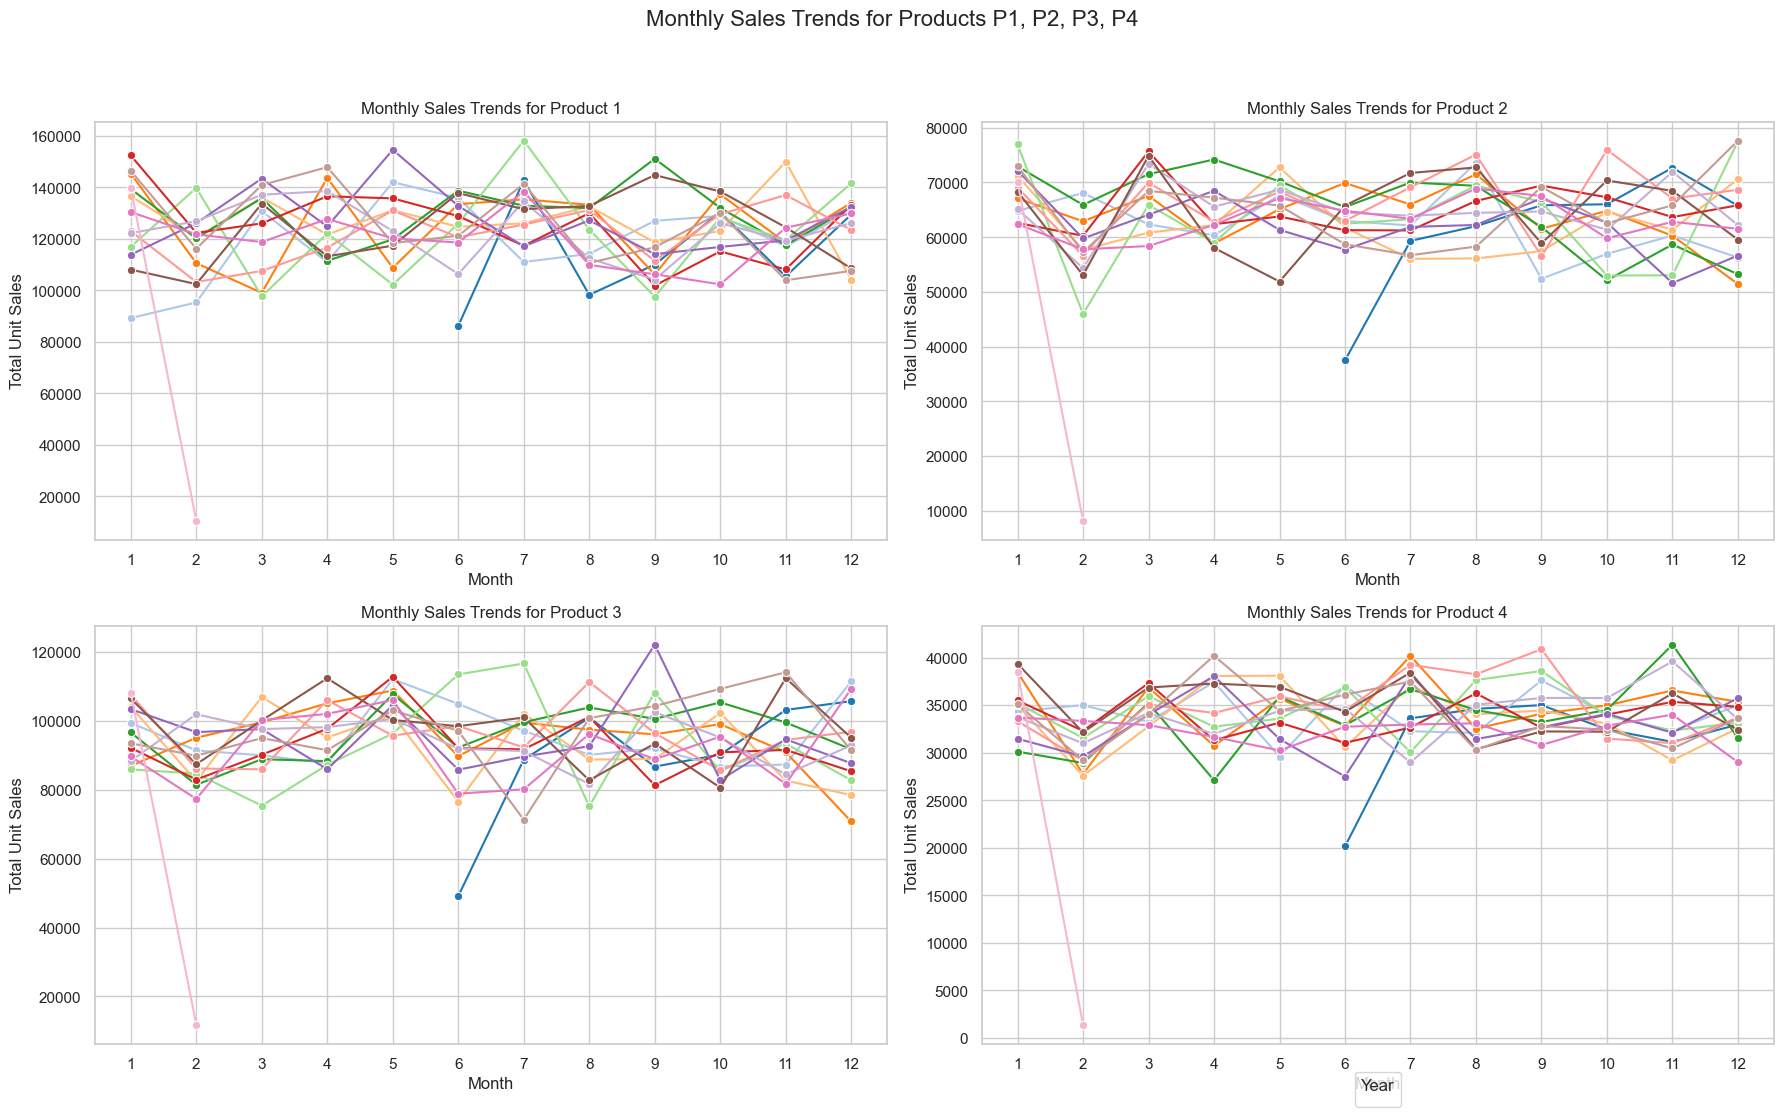

In [56]:

# Plotting sales trends for each product separately
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")

# List of product columns and titles
products = ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4']
titles = ['Product 1', 'Product 2', 'Product 3', 'Product 4']

# Loop to create a subplot for each product
for i, product in enumerate(products):
    plt.subplot(2, 2, i + 1)
    
    # Plot sales trends for the product
    sns.lineplot(x='Month', y=product, hue='Year', data=monthly_sales, palette='tab20', marker='o', linewidth=1.5, legend=False)
    
    # Customize each subplot
    plt.title(f'Monthly Sales Trends for {titles[i]}')
    plt.xlabel('Month')
    plt.ylabel('Total Unit Sales')
    plt.xticks(range(1, 13))  # Ensure the x-axis is correctly labeled for each month
    plt.grid(True)

# Add a single legend outside the plot
plt.legend(title='Year', loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=8)

# Overall plot adjustments
plt.suptitle('Monthly Sales Trends for Products P1, P2, P3, P4', fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

In [58]:
# Key Observations:

# Product 1 (Top Left Subplot):
# High Sales Variability: Product 1 shows significant variability in sales month-to-month and year-to-year, with noticeable peaks around June and July.
# Consistent High Peaks: There are consistent peaks in certain months (e.g., March, June, and December). These peaks might be tied to specific promotions, seasonal demand, or market conditions.
# Low Sales Period: A significant dip in February for several years suggests a trend of low demand during this month. This could be due to seasonal factors or other market influences.


# Product 2 (Top Right Subplot):
# Stable Sales with Seasonal Spikes: Product 2 shows relatively stable sales throughout the year with less extreme variation than Product 1. However, there are small spikes, particularly in March and November.
# Sales Drop in February: Similar to Product 1, there is a noticeable drop in sales during February for some years, indicating a potential trend.


# Product 3 (Bottom Left Subplot):
# Moderate Fluctuations with Noticeable Patterns: Product 3 shows moderate fluctuations, with peaks around July and November. However, there is less sharp variability compared to Product 1.
# Consistent Demand Throughout the Year: This product shows a consistent demand throughout the year with fewer drastic changes, suggesting stable consumer interest or steady market conditions.


# Product 4 (Bottom Right Subplot):
# Lower Sales Overall: Product 4 generally has lower sales compared to other products, with a more flattened trend line. This indicates less variability and potentially lower demand overall.
# Noticeable Peaks in April and October: There are some spikes in sales around April and October. These months could represent periods of targeted marketing or seasonality in product preference.
# Relatively Stable Trends: Similar to Product 2, this product maintains a more consistent pattern, but with overall lower sales.




# Recommendations for the CEO:

# Seasonal Patterns and Marketing Opportunities:
# There are clear seasonal patterns for certain products, such as Product 1 and Product 2. The company can capitalize on these peaks with targeted marketing campaigns, promotions, or optimized inventory levels to maximize sales during high-demand months.

# Focus on Consistently High-Performing Products:
# Product 1, despite its variability, shows consistent high peaks, indicating strong demand during specific periods. Investing in marketing efforts or promotional strategies around these peaks could boost revenue.
# Product 2 also demonstrates a stable demand, with fewer fluctuations, making it a reliable product to continue producing without major concerns.

# Potential to Discontinue or Redesign Product 4:
# Product 4 consistently shows lower sales compared to other products. A deeper analysis of its profitability, cost of production, and market demand should be conducted. If it is not contributing significantly to overall revenue, discontinuing or redesigning this product might be a viable option.

# Investigate Low Sales in February:
# The consistent low sales in February across multiple products suggest an opportunity to investigate external factors (e.g., economic conditions, competitor activity) or to develop new strategies to boost sales during this period.

# Plan for Future Sales Predictions:
# Based on the identified patterns, predictive models can be built to forecast future sales for 2024. The company can use these forecasts to plan inventory, marketing budgets, and promotional efforts.


#### task 3: Identify the Best-Selling Product: Determine which product has the highest sales in all given years.

In [64]:

# Calculate total sales for each product across all years
total_sales_p1 = data['Q-P1'].sum()
total_sales_p2 = data['Q-P2'].sum()
total_sales_p3 = data['Q-P3'].sum()
total_sales_p4 = data['Q-P4'].sum()

# Create a dictionary to store the total sales for each product
total_sales = {
    'Product 1': total_sales_p1,
    'Product 2': total_sales_p2,
    'Product 3': total_sales_p3,
    'Product 4': total_sales_p4
}

# Identify the product with the highest total sales
best_selling_product = max(total_sales, key=total_sales.get)
best_selling_sales = total_sales[best_selling_product]

# Display the results
print("Total Sales of Each Product:")
for product, sales in total_sales.items():
    print(f"{product}: {sales}")

print(f"\nThe best-selling product is {best_selling_product} with total sales of {best_selling_sales} units.")


Total Sales of Each Product:
Product 1: 18860169
Product 2: 9741271
Product 3: 14379603
Product 4: 5139979

The best-selling product is Product 1 with total sales of 18860169 units.


In [66]:
# DOCUMENTATION: I ENCOURTED ONE ERROR, WHILE DOING THE TASK ABOVE, 

# # The KeyError: 'Q1' you're encountering means that the DataFrame data does not have a column named 'Q1'

# the solution to it was to observe the names of the columns to find out if it was a typo error; solution below 

# print(data.columns)  # Check what columns are available


# and #Yes it was a typo error 

Index(['Unnamed: 0', 'Date', 'Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2',
       'S-P3', 'S-P4', 'Month', 'Year'],
      dtype='object')


#### task 4 Estimate Sales on December 31st: Predict the number of units sold on December 31st if retail centers were open.

In [70]:
# Extract features: day of year, month, and other numerical features
data['DayOfYear'] = data['Date'].dt.dayofyear
data['Month'] = data['Date'].dt.month

# Define the features (X) and target (y) for the model
# We'll use 'DayOfYear' and 'Month' as features, and target 'Q-P1' for prediction
X = data[['DayOfYear', 'Month']]
y = data['Q-P1']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Create a DataFrame with features for December 31st
# December 31st has day of year 365 and month 12
X_pred = pd.DataFrame({'DayOfYear': [365], 'Month': [12]})

# Predict sales for December 31st
predicted_sales = model.predict(X_pred)
print(f"Estimated sales on December 31st: ${predicted_sales[0]:.2f}")

Estimated sales on December 31st: $4026.90


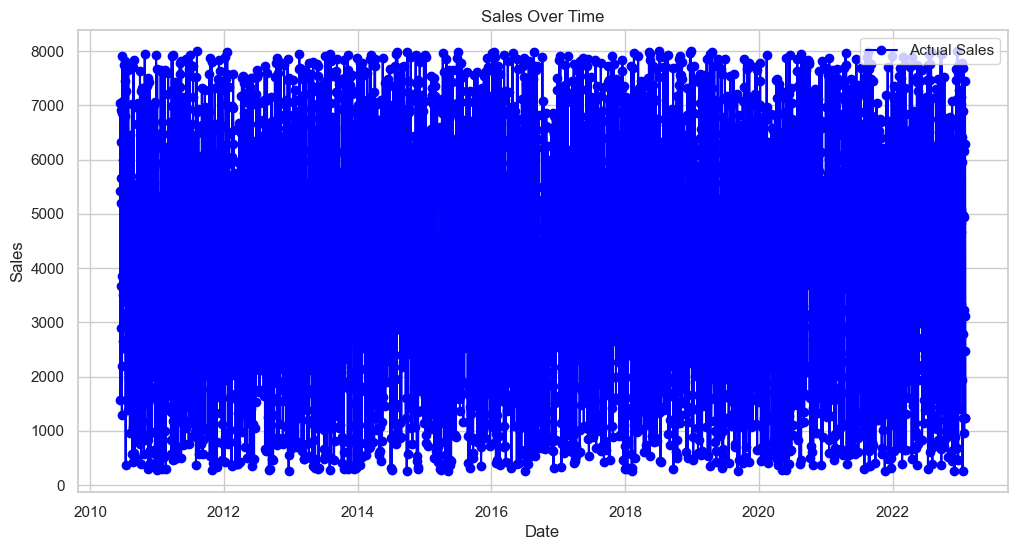

In [72]:
import matplotlib.pyplot as plt

# Plotting the sales data
plt.figure(figsize=(12, 6))

# Plot actual sales data
plt.plot(data['Date'], data['Q-P1'], label='Actual Sales', color='blue', marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [ ]:
# Visualize Feature Importance

In [ ]:
Visualize Feature Importance

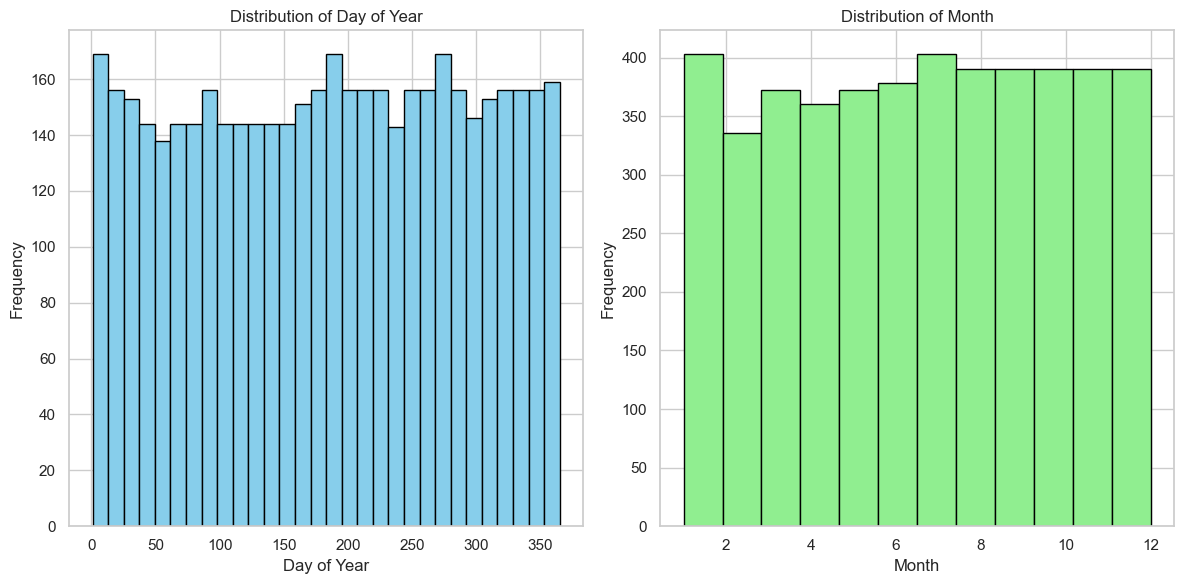

In [74]:
# Plotting the distribution of features
plt.figure(figsize=(12, 6))

# Plot DayOfYear feature
plt.subplot(1, 2, 1)
plt.hist(data['DayOfYear'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Day of Year')
plt.ylabel('Frequency')
plt.title('Distribution of Day of Year')

# Plot Month feature
plt.subplot(1, 2, 2)
plt.hist(data['Month'], bins=12, color='lightgreen', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Month')

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
# Visualize the Regression Model
# To visualize how well the  model fits the data and the prediction for December 31st, you can create a scatter plot with the regression line.

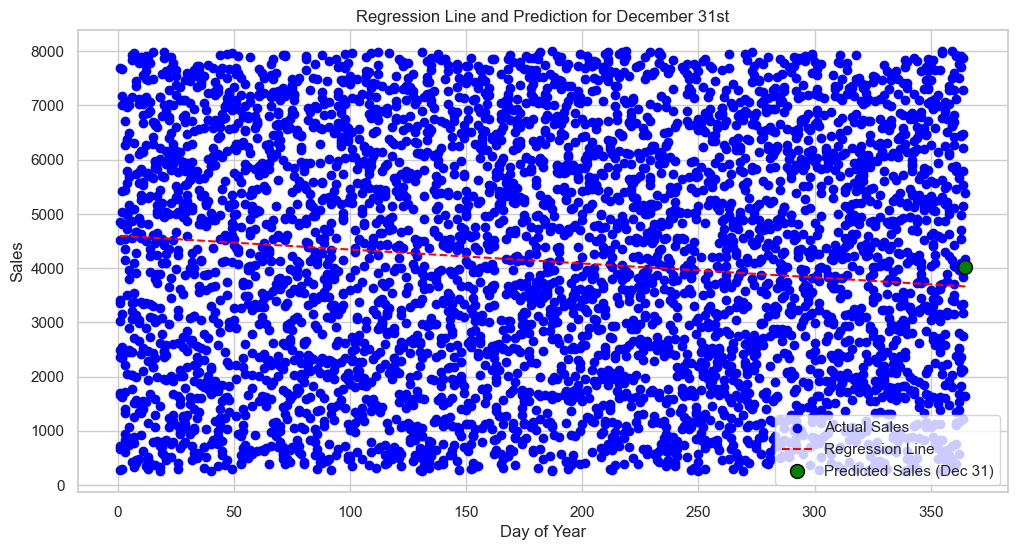

In [76]:
# Plotting the data and the regression line
plt.figure(figsize=(12, 6))

# Scatter plot of actual data
plt.scatter(data['DayOfYear'], data['Q-P1'], color='blue', label='Actual Sales')

# Plotting the regression line
line_x = np.linspace(data['DayOfYear'].min(), data['DayOfYear'].max(), 100)
line_y = model.predict(pd.DataFrame({'DayOfYear': line_x, 'Month': [data['Month'].mean()] * len(line_x)}))
plt.plot(line_x, line_y, color='red', linestyle='--', label='Regression Line')

# Highlight the prediction for December 31st
plt.scatter([365], [predicted_sales[0]], color='green', s=100, edgecolor='black', zorder=5, label='Predicted Sales (Dec 31)')

# Adding labels and title
plt.xlabel('Day of Year')
plt.ylabel('Sales')
plt.title('Regression Line and Prediction for December 31st')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


##### task 5

Current total sales by product:
Q-P1: $18860169.00
Q-P2: $9741271.00
Q-P3: $14379603.00
Q-P4: $5139979.00
S-P1: $59786735.73
S-P2: $61759658.14
S-P3: $77937448.26
S-P4: $36648050.27

Impact of removing Q-P1:
Total sales without Q-P1: $265392745.40


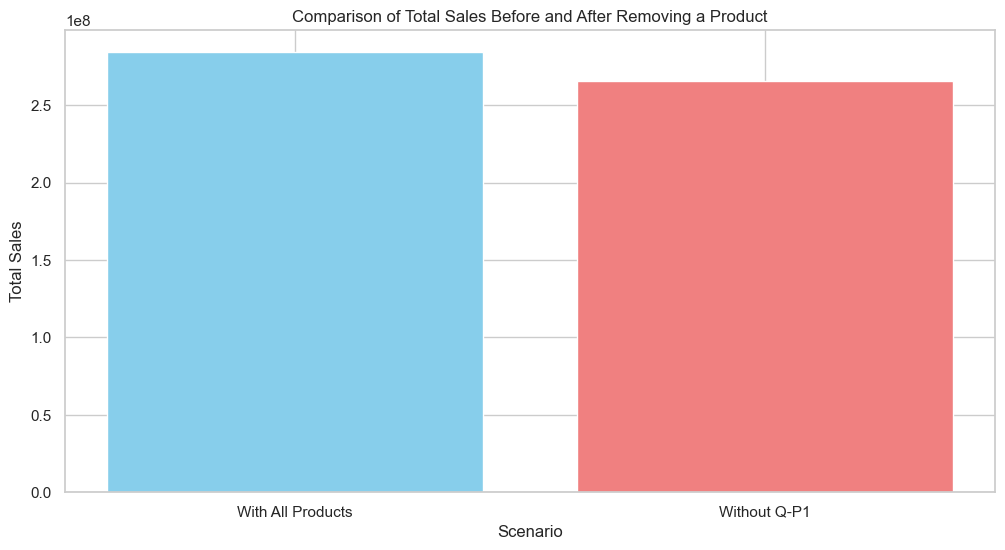

In [81]:
# Calculate total sales for each product
product_columns = ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2', 'S-P3', 'S-P4']
total_sales_per_product = {col: data[col].sum() for col in product_columns}

# Display current total sales
print("Current total sales by product:")
for product, sales in total_sales_per_product.items():
    print(f"{product}: ${sales:.2f}")

# Define a function to simulate the removal of a product
def simulate_product_removal(product_to_remove):
    # Remove the specified product from the dataset
    modified_data = data.drop(columns=[product_to_remove])
    
    # Calculate the new total sales for remaining products
    remaining_product_columns = [col for col in product_columns if col != product_to_remove]
    total_sales_remaining = {col: modified_data[col].sum() for col in remaining_product_columns}
    total_sales_without_product = sum(total_sales_remaining.values())
    
    return total_sales_without_product, total_sales_remaining

# Choose a product to remove and analyze the impact
product_to_remove = 'Q-P1' 
total_sales_without_product, sales_remaining = simulate_product_removal(product_to_remove)

# Display the impact of removal
print(f"\nImpact of removing {product_to_remove}:")
print(f"Total sales without {product_to_remove}: ${total_sales_without_product:.2f}")

# Plotting the comparison of total sales
plt.figure(figsize=(12, 6))

# Total sales with all products
total_sales_with_all_products = sum(total_sales_per_product.values())

# Data for plotting
scenarios = ['With All Products', f'Without {product_to_remove}']
sales_values = [total_sales_with_all_products, total_sales_without_product]

# Plotting
plt.bar(scenarios, sales_values, color=['skyblue', 'lightcoral'])

# Adding labels and title
plt.xlabel('Scenario')
plt.ylabel('Total Sales')
plt.title('Comparison of Total Sales Before and After Removing a Product')
plt.grid(True)

# Display the plot
plt.show()

task 6, 7.Predict Sales and Revenue for 2024: Forecast the yearly sales and revenues for the year 2024.

Invalid date at index 109: 31-9-2010
Invalid date at index 170: 31-11-2010
Invalid date at index 473: 31-9-2011
Invalid date at index 534: 31-11-2011
Invalid date at index 836: 31-9-2012
Invalid date at index 897: 31-11-2012
Invalid date at index 1200: 31-9-2013
Invalid date at index 1261: 31-11-2013
Invalid date at index 1564: 31-9-2014
Invalid date at index 1625: 31-11-2014
Invalid date at index 1928: 31-9-2015
Invalid date at index 1989: 31-11-2015
Invalid date at index 2291: 31-9-2016
Invalid date at index 2352: 31-11-2016
Invalid date at index 2655: 31-9-2017
Invalid date at index 2716: 31-11-2017
Invalid date at index 3019: 31-9-2018
Invalid date at index 3080: 31-11-2018
Invalid date at index 3383: 31-9-2019
Invalid date at index 3444: 31-11-2019
Invalid date at index 3746: 31-9-2020
Invalid date at index 3807: 31-11-2020
Invalid date at index 4110: 31-9-2021
Invalid date at index 4171: 31-11-2021
Invalid date at index 4474: 31-9-2022
Invalid date at index 4535: 31-11-2022
Found

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/var/folders/0m/1brybjqs2mn7_xn611b0pxnc0000gn/T/ipykernel_1604/3279888183.py:54: FutureWarning: 'Y' is deprecated 

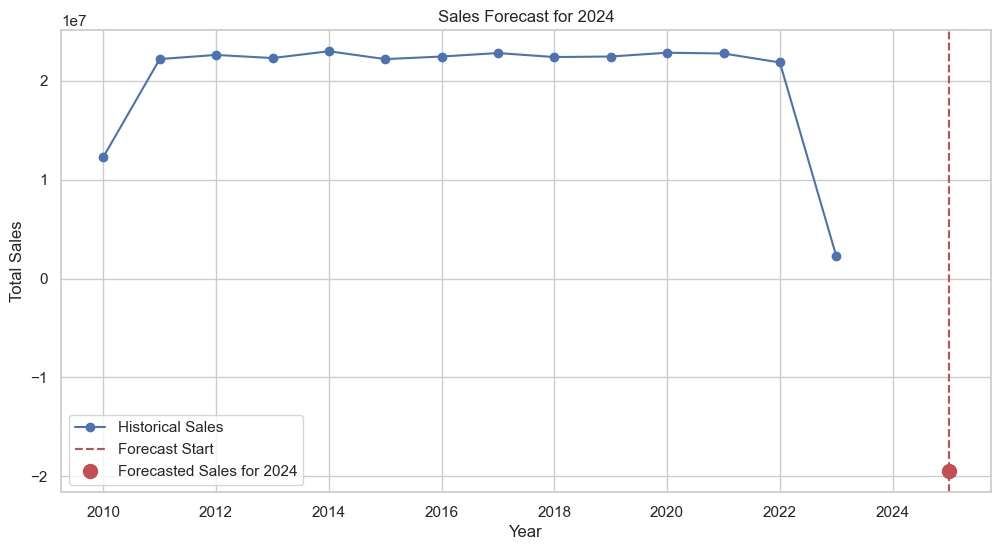

Forecasted total sales for 2024: $-19,481,408.66


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime


# Check for and display invalid date entries
# Use a try-except block to identify problematic rows
def check_dates(date_series):
    for idx, date in enumerate(date_series):
        try:
            datetime.strptime(date, '%d-%m-%Y')
        except ValueError:
            print(f"Invalid date at index {idx}: {date}")

check_dates(data['Date'])

# Convert 'Date' to datetime format with error handling
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')

# Check for any rows where conversion failed
if data['Date'].isna().any():
    print(f"Found {data['Date'].isna().sum()} invalid dates.")
    print(data[data['Date'].isna()])

# Drop rows with invalid dates if necessary
data = data.dropna(subset=['Date'])

# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Ensure we only select numeric columns for aggregation
numeric_columns = ['Q-P1', 'Q-P2', 'Q-P3', 'Q-P4', 'S-P1', 'S-P2', 'S-P3', 'S-P4']
yearly_sales = data.groupby('Year')[numeric_columns].sum()

# Calculate total sales for each year
yearly_sales['Total_Sales'] = yearly_sales.sum(axis=1)

# Convert the index to a DateTimeIndex for better time series handling
yearly_sales.index = pd.to_datetime(yearly_sales.index.astype(str), format='%Y')

# Fit an ARIMA model to forecast sales
model = ARIMA(yearly_sales['Total_Sales'], order=(1, 1, 1))  # Adjust (p,d,q) if necessary
model_fit = model.fit()

# Forecast sales for the year 2024
forecast_steps = 1
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Convert forecast index to datetime for plotting
forecast_index = pd.date_range(start=yearly_sales.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='Y')

# Plot historical total sales and forecast
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales.index, yearly_sales['Total_Sales'], marker='o', linestyle='-', color='b', label='Historical Sales')
plt.axvline(x=forecast_index[0], color='r', linestyle='--', label='Forecast Start')
plt.scatter(forecast_index, forecast_mean, color='r', s=100, zorder=5, label='Forecasted Sales for 2024')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Forecast for 2024')
plt.legend()
plt.grid(True)
plt.show()

# Display forecast
print(f"Forecasted total sales for 2024: ${forecast_mean.iloc[0]:,.2f}")
